# Movies dataset

In the first step of the project, we should import libraries:

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
import json
from scipy import stats
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet


In [ ]:
pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 36.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3096334 sha256=64e3606ea636e153c7bd6574620482d6410e3694cfc2f21cfde5a007a51f3880
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
from surprise import Reader, Dataset, SVD

In [ ]:
drive.mount('content')

Mounted at content


In [ ]:
movies = pd.read_csv('/content/content/MyDrive/movies_metadata.csv')

<ipython-input-5-ca39086643b4>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('/content/content/MyDrive/movies_metadata.csv')


In [ ]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [ ]:
for i in range(10):
  print(movies.genres[i])

[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]
[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]
[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]
[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]
[{'id': 35, 'name': 'Comedy'}]
[{'id': 28, 'name': 'Action'}, {'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, 'name': 'Thriller'}]
[{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}]
[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}]
[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 53, 'name': 'Thriller'}]
[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
movies.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

Now we want to remove duplicate rows/columns and any rows/columns of data that are either NaN or null. Also we will remove(drop) these columns:

imdb_id: both ratings.csv and keywords.csv has id column to match with movies metadata dataset, so we do not need this column.

homepage: this column is usless for movie recommendation analysis and there will be no analysis depending on the homepage of the movie.

original_title: this column can be removed because title column is also included and original_title column has non-ASCII characters.

spoken_languages: original_language is included, so we do not need this column.

video & poster_path: we won't do any image or video related processing. So we can drop this column.

In [ ]:
movies.drop(["homepage", "poster_path", "video", "imdb_id", "original_title", "spoken_languages"], axis=1, inplace=True)

In [ ]:
movies.head()

,adult,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0


In [ ]:
print(movies.columns)

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'id',
       'original_language', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime', 'status',
       'tagline', 'title', 'vote_average', 'vote_count'],
      dtype='object')


As you can see, those columns are not in columns list anymore.

In [ ]:
movies.shape

(45466, 18)

In this step, we identify and display duplicated records in the movies dataset. Duplicated records are rows that have identical values across all columns:

In [ ]:
duplicated_records = movies[movies.duplicated()]
print(duplicated_records.head(3))

      adult belongs_to_collection budget  \
1465  False                   NaN      0   
9165  False                   NaN      0   
9327  False                   NaN      0   

                                                 genres      id  \
1465  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...  105045   
9165  [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...    5511   
9327  [{'id': 12, 'name': 'Adventure'}, {'id': 16, '...   23305   

     original_language                                           overview  \
1465                de  East-Berlin, 1961, shortly after the erection ...   
9165                fr  Hitman Jef Costello is a perfectionist who alw...   
9327                en  In feudal India, a warrior (Khan) who renounce...   

     popularity                               production_companies  \
1465   0.122178  [{'name': 'Studio Babelsberg', 'id': 264}, {'n...   
9165   9.091288  [{'name': 'Fida cinematografica', 'id': 73}, {...   
9327   1.967992                 [{'

Removing rows from the movies DataFrame that contain all missing values (NaN) across all columns:

In [ ]:
movies = movies.dropna(how='all')

In [ ]:
movies.shape

(45466, 18)

In [ ]:
movies.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
id                           0
original_language           11
overview                   954
popularity                   5
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
status                      87
tagline                  25054
title                        6
vote_average                 6
vote_count                   6
dtype: int64

In [ ]:
movies.shape

(45466, 18)

Now we count the number of missing (NaN) values in the 'title' column of the DataFrame:

In [ ]:
movies['title'].isna().sum()

6

There are 6 rows Out of 45449 rows,  with no title so we drop that:

In [ ]:
movies.dropna(subset=["title"], inplace=True)

the types of id, popularity and budget is object, although they had to be numeric. Errors will be handled with coerce option, thus invalid parsing will be set as NaN. Also converting release_date to datetime instead of object and extracting the year data may be helpful:

In [ ]:
movies["id"] = pd.to_numeric(movies['id'], errors='coerce', downcast="integer")
movies["popularity"] =pd.to_numeric(movies['popularity'], errors='coerce', downcast="float")
movies["budget"] =pd.to_numeric(movies['budget'], errors='coerce', downcast="float")
movies['release_date'] = pd.to_datetime(movies['release_date'])
movies['release_year'] = movies['release_date'].dt.year

Due to the excessive number of null values in the belongs_to_collection column, we can transform the data to 0 and 1 instead of the collection name, with 0 denoting not belonging and 1 denoting belonging:

In [ ]:
movies['belongs_to_collection'] = movies['belongs_to_collection'].fillna("None")
movies['belongs_to_collection'] = (movies['belongs_to_collection'] != "None").astype(int)

Only 9 True values are present in the adult column, which means that information will not be useful to us and that column has also been removed:



In [ ]:
movies["adult"].value_counts()

False    45451
True         9
Name: adult, dtype: int64

In [ ]:
movies.drop(["adult"], inplace=True, axis=1)

In [ ]:
movies.head(5)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,release_year
0,1,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0,1995.0
1,0,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995.0
2,1,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995.0
3,0,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,1995.0
4,1,0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995.0


In [ ]:
movies.isnull().sum()

belongs_to_collection        0
budget                       0
genres                       0
id                           0
original_language           11
overview                   954
popularity                   0
production_companies         0
production_countries         0
release_date                84
revenue                      0
runtime                    257
status                      81
tagline                  25048
title                        0
vote_average                 0
vote_count                   0
release_year                84
dtype: int64

Less than 100 entries in the status column are null, thus it could be a good idea to fill these with the most common data:

In [ ]:
movies["status"].fillna(movies["status"].value_counts().idxmax(), inplace=True)

In [ ]:
movies.isnull().sum()

belongs_to_collection        0
budget                       0
genres                       0
id                           0
original_language           11
overview                   954
popularity                   0
production_companies         0
production_countries         0
release_date                84
revenue                      0
runtime                    257
status                       0
tagline                  25048
title                        0
vote_average                 0
vote_count                   0
release_year                84
dtype: int64

Less than 100 entries in the runtime column are null. So we can fill NaN values with the mean:

In [ ]:
movies["runtime"] = movies["runtime"].replace(0, np.nan)
movies["runtime"].fillna(movies["runtime"].mean(), inplace=True)

In [ ]:
movies.isnull().sum()

belongs_to_collection        0
budget                       0
genres                       0
id                           0
original_language           11
overview                   954
popularity                   0
production_companies         0
production_countries         0
release_date                84
revenue                      0
runtime                      0
status                       0
tagline                  25048
title                        0
vote_average                 0
vote_count                   0
release_year                84
dtype: int64

There are 70 null release_date entries. It's good to drop them:

In [ ]:
movies.dropna(subset=["release_date"],inplace=True)

In [ ]:
movies.isnull().sum()

belongs_to_collection        0
budget                       0
genres                       0
id                           0
original_language           11
overview                   941
popularity                   0
production_companies         0
production_countries         0
release_date                 0
revenue                      0
runtime                      0
status                       0
tagline                  24978
title                        0
vote_average                 0
vote_count                   0
release_year                 0
dtype: int64

1 row that has null as in column original_language will be dropped:


In [ ]:
movies.dropna(subset=["original_language"],inplace=True)

In [ ]:
movies.isnull().sum()

belongs_to_collection        0
budget                       0
genres                       0
id                           0
original_language            0
overview                   940
popularity                   0
production_companies         0
production_countries         0
release_date                 0
revenue                      0
runtime                      0
status                       0
tagline                  24967
title                        0
vote_average                 0
vote_count                   0
release_year                 0
dtype: int64

In [ ]:
movies.shape

(45365, 18)

Some cells contain a stringified list of json inputs, such as production_companies, production_countries, and genres. These have to be transformed into a list of inputs for simpler processing. So we implement this function which converts json list to list of inputs:


In [ ]:
def json_to_arr(cell, wanted = "name"):
    cell = literal_eval(cell)
    if cell == [] or (isinstance(cell, float) and cell.isna()):
        return np.nan
    result = []
    counter = 0
    for element in cell:
        if counter < 3:
            result.append(element[wanted])
            counter += 1
        else:
            break
    return result[:3]

Now we use this function to genres, production_countries and production_companies columns:

In [ ]:
movies[['genres']] = movies[['genres']].applymap(json_to_arr)
movies[['production_countries']] = movies[['production_countries']].applymap(lambda row: json_to_arr(row, "iso_3166_1"))
movies[['production_companies']] = movies[['production_companies']].applymap(json_to_arr)

In [ ]:
movies.head(5)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,release_year
0,1,30000000.0,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[US],1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0,1995.0
1,0,65000000.0,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[US],1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995.0
2,1,0.0,"[Romance, Comedy]",15602,en,A family wedding reignites the ancient feud be...,11.712900,"[Warner Bros., Lancaster Gate]",[US],1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995.0
3,0,16000000.0,"[Comedy, Drama, Romance]",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[Twentieth Century Fox Film Corporation],[US],1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,1995.0
4,1,0.0,[Comedy],11862,en,Just when George Banks has recovered from his ...,8.387519,"[Sandollar Productions, Touchstone Pictures]",[US],1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995.0


Many budget and revenue entries are zero. To see how many entries are genuinely available, NaN makes more sense than 0, though:



In [ ]:
movies['budget'] = movies['budget'].replace(0 , pd.np.nan)
movies['revenue'] = movies['revenue'].replace(0 , pd.np.nan)

<ipython-input-40-f48c4285a7ec>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  movies['budget'] = movies['budget'].replace(0 , pd.np.nan)
<ipython-input-40-f48c4285a7ec>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  movies['revenue'] = movies['revenue'].replace(0 , pd.np.nan)


In [ ]:
movies.isnull().sum()

belongs_to_collection        0
budget                   36479
genres                    2383
id                           0
original_language            0
overview                   940
popularity                   0
production_companies     11792
production_countries      6209
release_date                 0
revenue                  37958
runtime                      0
status                       0
tagline                  24967
title                        0
vote_average                 0
vote_count                   0
release_year                 0
dtype: int64

checking the distribution of revenue and budget:

<Axes: xlabel='revenue', ylabel='Density'>

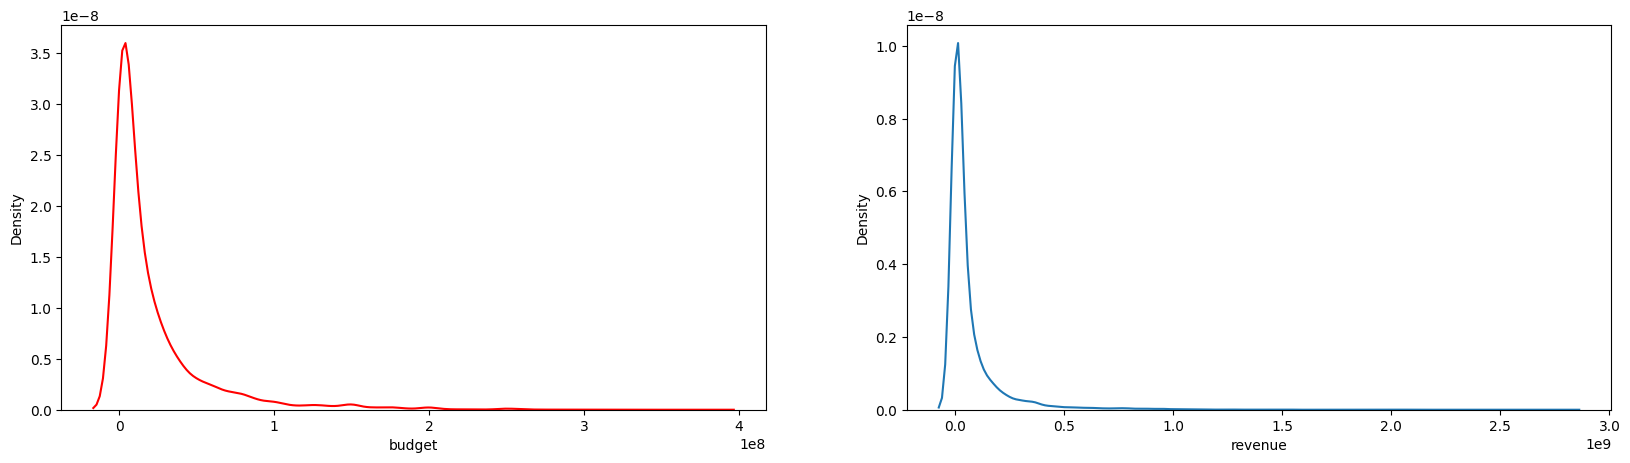

In [ ]:
movies3 = movies.copy()
figure, ax = plt.subplots(1, 2 , figsize=(20, 5))
sns.kdeplot(ax=ax[0] , x = movies3['budget'],color = 'red',)
sns.kdeplot(ax = ax[1] , x = movies3['revenue'])

Some rows that have a budget and revenue value are not scaled, so we decide to implement this scaling function:

In [ ]:
def scale_money(num):
    if num < 100:
        return num * 1000000
    elif num >= 100 and num < 1000:
        return num * 10000
    elif num >= 1000 and num < 10000:
        return num *100
    else:
        return num

*   If the value is less than 100, it is multiplied by 1,000,000 (1 million).
*   If the value is between 100 and 1000 (inclusive), it is multiplied by 10,000.

*   If the value is between 1000 and 10000 (inclusive), it is multiplied by 100.
*   For values greater than or equal to 10000, no scaling is applied, and the original value is returned.
   

In [ ]:
movies[['budget', 'revenue']] = movies[['budget', 'revenue']].applymap(scale_money)

In [ ]:
movies.isnull().sum()

belongs_to_collection        0
budget                   36479
genres                    2383
id                           0
original_language            0
overview                   940
popularity                   0
production_companies     11792
production_countries      6209
release_date                 0
revenue                  37958
runtime                      0
status                       0
tagline                  24967
title                        0
vote_average                 0
vote_count                   0
release_year                 0
dtype: int64

For genres and country,we can fill the values with the most appearing entry or mean. The function below analyzes the most occuring values for each column in lists:

In [ ]:
def list_counter(col, limiter = 9999):
    result = dict()
    for cell in col:
        if isinstance(cell, float):
            continue
        for element in cell:
            if element in result:
                result[element] += 1
            else:
                result[element] = 1
    result = {k: v for k, v in sorted(result.items(), key=lambda item: item[1], reverse=True)}
    counter = 1
    sum_selected = 0
    total_selected = 0
    rest = 0
    returned = []
    for i in result:
        if counter > limiter:
            total_selected += result[i]
        else:
            counter += 1
            sum_selected += result[i]
            total_selected += result[i]
            returned.append([i, result[i]])
    return returned

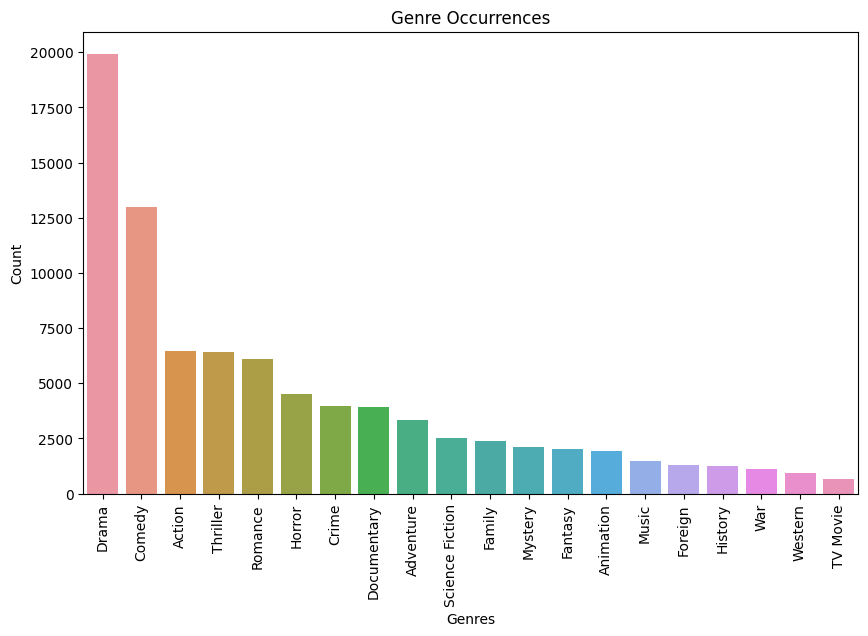

In [ ]:
genres_occur = list_counter(movies["genres"].values)
genres = pd.DataFrame.from_records(genres_occur, columns=["genres", "count"])

plt.figure(figsize=(10, 6))

sns.barplot(data=genres, x="genres", y="count")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.title("Genre Occurrences")

plt.xticks(rotation=90)

plt.show()

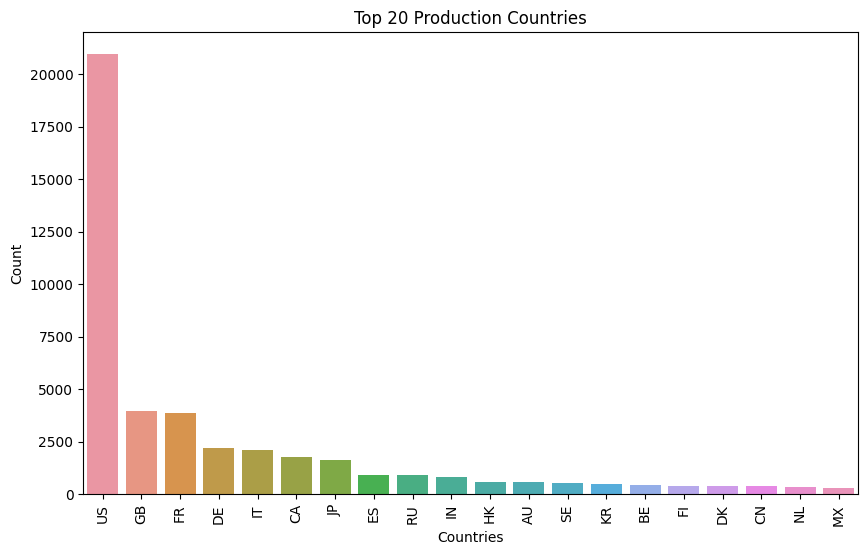

In [ ]:
countries_occur = list_counter(movies["production_countries"].values)
countries = pd.DataFrame.from_records(countries_occur, columns=["countries", "count"])

plt.figure(figsize=(10, 6))

sns.barplot(data=countries.head(20), x="countries", y="count")
plt.xlabel("Countries")
plt.ylabel("Count")
plt.title("Top 20 Production Countries")

plt.xticks(rotation=90)

plt.show()

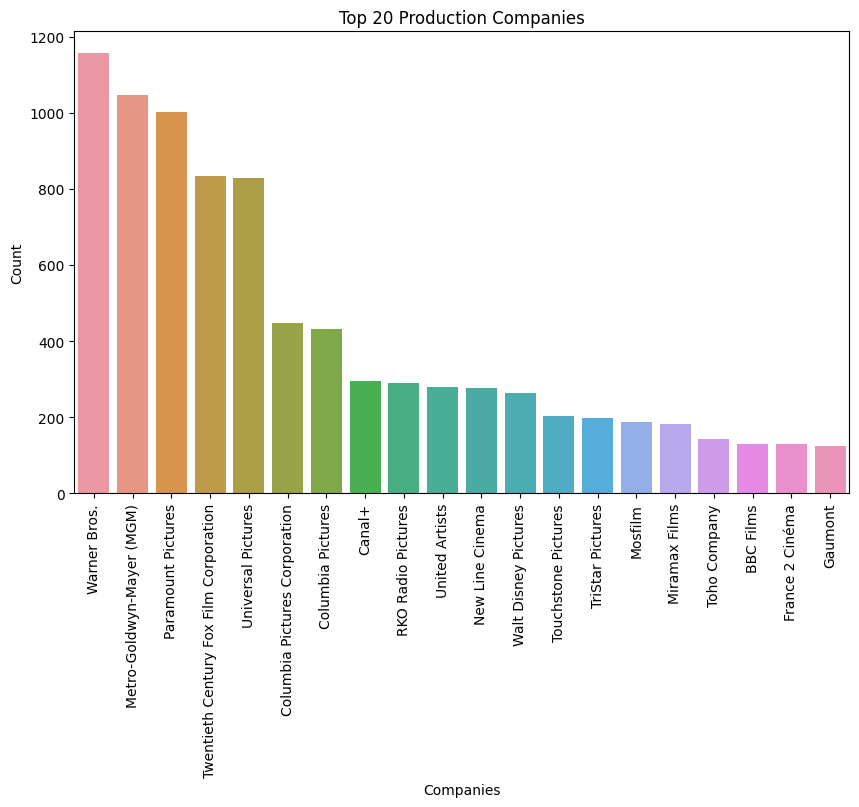

In [ ]:
companies_occur = list_counter(movies["production_companies"].values)
companies = pd.DataFrame.from_records(companies_occur, columns=["companies", "count"])

plt.figure(figsize=(10, 6))

sns.barplot(data=companies.head(20), x="companies", y="count")
plt.xlabel("Companies")
plt.ylabel("Count")
plt.title("Top 20 Production Companies")

plt.xticks(rotation=90)

plt.show()

In production_countries US is the most occurring one and in genres Drama is the most occurring one. We can be place these into NA cells of these columns:

In [ ]:
def fill_na_with_list(cell, data):
    if isinstance(cell, float):
        return data
    else:
        return cell

In [ ]:
movies[['genres']] = movies[['genres']].applymap(lambda row: fill_na_with_list(row, [genres_occur[0][0]]))
movies[['production_countries']] = movies[['production_countries']].applymap(lambda row: fill_na_with_list(row, [countries_occur[0][0]]))

In [ ]:
movies.shape

(45365, 18)

In [ ]:
movies.isnull().sum()

belongs_to_collection        0
budget                   36479
genres                       0
id                           0
original_language            0
overview                   940
popularity                   0
production_companies     11792
production_countries         0
release_date                 0
revenue                  37958
runtime                      0
status                       0
tagline                  24967
title                        0
vote_average                 0
vote_count                   0
release_year                 0
dtype: int64

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45365 entries, 0 to 45465
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  45365 non-null  int64         
 1   budget                 8886 non-null   float64       
 2   genres                 45365 non-null  object        
 3   id                     45365 non-null  int32         
 4   original_language      45365 non-null  object        
 5   overview               44425 non-null  object        
 6   popularity             45365 non-null  float32       
 7   production_companies   33573 non-null  object        
 8   production_countries   45365 non-null  object        
 9   release_date           45365 non-null  datetime64[ns]
 10  revenue                7407 non-null   float64       
 11  runtime                45365 non-null  float64       
 12  status                 45365 non-null  object        
 13  t

# ➡ More data exploring on votes and genres

***Histogram of number of votes:***

In [ ]:
vote_count_range = range(int(movies['vote_count'].min()), int(movies['vote_count'].max()) + 1)

The number of votes per movie ranges from 0 to 13,752

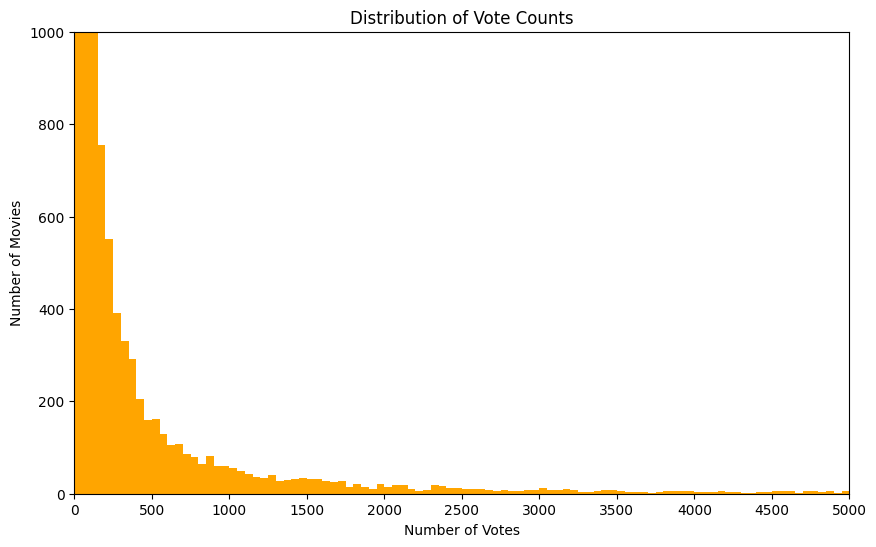

In [ ]:
plt.figure(figsize=(10, 6))

plt.hist(movies['vote_count'], bins=range(0, 5001, 50), color='orange')
plt.xlabel('Number of Votes')
plt.ylabel('Number of Movies')
plt.title('Distribution of Vote Counts')

plt.xticks(range(0, 5001, 500))

plt.xlim(0, 5000)
plt.ylim(0, 1000)

plt.show()

***

***Movies with the highest number of votes:***

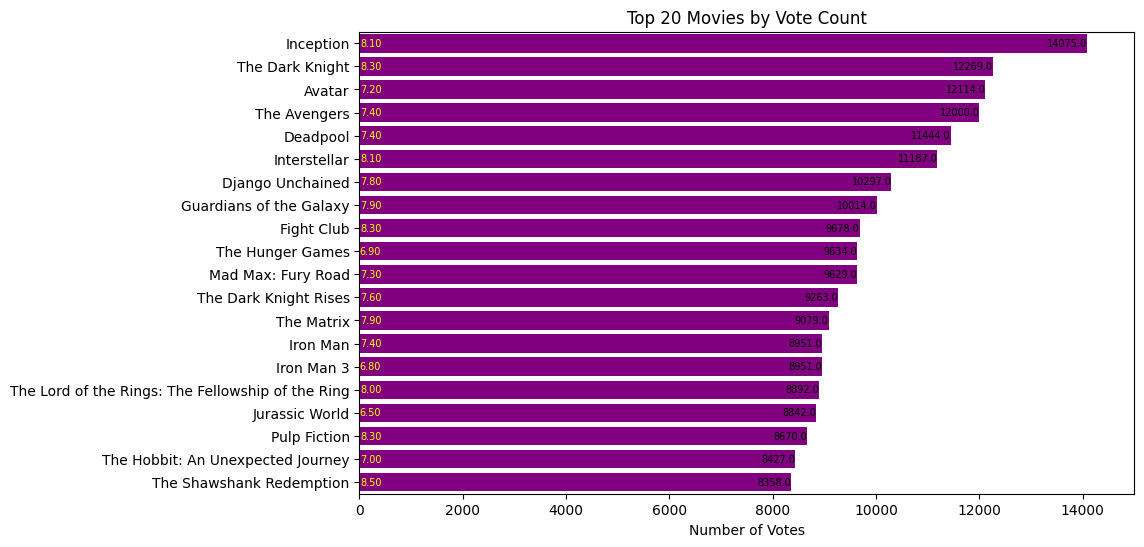

In [ ]:
top_movies = movies.nlargest(20, 'vote_count')

plt.figure(figsize=(10, 6))

plt.barh(top_movies['title'], top_movies['vote_count'], color='purple')
plt.gca().invert_yaxis()

plt.xlabel('Number of Votes')
plt.ylabel('')
plt.title('Top 20 Movies by Vote Count')

for i, count in enumerate(top_movies['vote_count']):
    plt.text(count, i, str(count), va='center', ha='right', color='black', size=7)

for i, average in enumerate(top_movies['vote_average']):
    plt.text(average, i, f'{average:.2f}', va='center', ha='left', color='yellow', size=7)

plt.xlim(0, 15000)
plt.ylim(len(top_movies) - 0.5, -0.5)

plt.show()

As you see The lowest vote_average within the Top20 movies with most votes is 6.8.
most of the movies had good voting average.

***Movies with the highest vote average:***

Now we can see the top20 of movies with the highest vote_average that received at least 250 votes (first column, yellow numbers):

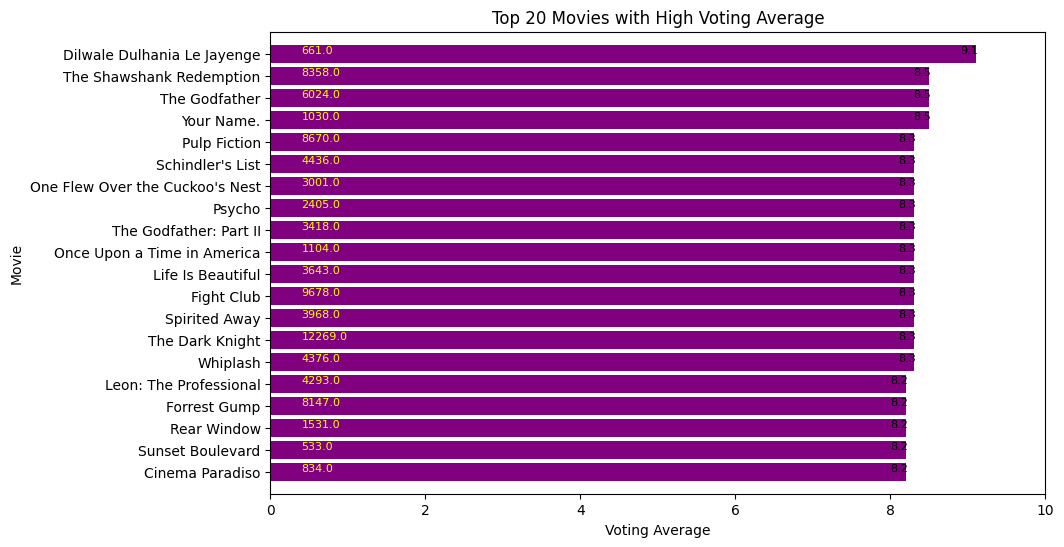

In [ ]:
filtered_movies = movies[movies['vote_count'] > 250].nlargest(20, 'vote_average')

plt.figure(figsize=(10, 6))

plt.barh(range(len(filtered_movies)), filtered_movies['vote_average'], color='purple')
plt.xlabel('Voting Average')
plt.ylabel('Movie')
plt.title('Top 20 Movies with High Voting Average')

plt.xlim(0, 10)
plt.ylim(-1, 20)

plt.yticks(range(len(filtered_movies)), filtered_movies['title'])
plt.gca().invert_yaxis()

for i in range(len(filtered_movies)):
    plt.text(filtered_movies['vote_average'].iloc[i] - 0.2, i, str(filtered_movies['vote_average'].iloc[i]), color='black', fontsize=8)
    plt.text(0.4, i, str(filtered_movies['vote_count'].iloc[i]), color='yellow', fontsize=8)

plt.show()

# Keywords dataset

In [ ]:
keywords = pd.read_csv('/content/content/MyDrive/keywords.csv')

In [ ]:
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [ ]:
keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


Keywords format is stringified list of json. So we convert it to a list:

In [ ]:
def json_to_arr(cell, wanted = "name"):
    cell = literal_eval(cell)
    if cell == [] or (isinstance(cell, float) and cell.isna()):
        return np.nan
    result = []
    counter = 0
    for element in cell:
        if counter < 3:
            result.append(element[wanted])
            counter += 1
        else:
            break
    return result[:3]

In [ ]:
keywords["keywords"] = keywords[['keywords']].applymap(json_to_arr)

In [ ]:
keywords["keywords"]

0                                     [jealousy, toy, boy]
1        [board game, disappearance, based on children'...
2             [fishing, best friend, duringcreditsstinger]
3        [based on novel, interracial relationship, sin...
4                       [baby, midlife crisis, confidence]
                               ...                        
46414                                        [tragic love]
46415                                [artist, play, pinoy]
46416                                                  NaN
46417                                                  NaN
46418                                                  NaN
Name: keywords, Length: 46419, dtype: object

first we calculate and print the number of missing values in each column of the keywords DataFrame:

In [ ]:
null = keywords.isna().sum()
print(null)

id              0
keywords    14795
dtype: int64


and then removes any rows with missing values from the DataFrame:

In [ ]:
keywords.dropna(inplace=True)

In [ ]:
def list_counter(col, limiter = 9999):
    result = dict()
    for cell in col:
        if isinstance(cell, float):
            continue
        for element in cell:
            if element in result:
                result[element] += 1
            else:
                result[element] = 1
    result = {k: v for k, v in sorted(result.items(), key=lambda item: item[1], reverse=True)}
    counter = 1
    sum_selected = 0
    total_selected = 0
    rest = 0
    returned = []
    for i in result:
        if counter > limiter:
            total_selected += result[i]
        else:
            counter += 1
            sum_selected += result[i]
            total_selected += result[i]
            returned.append([i, result[i]])
    return returned

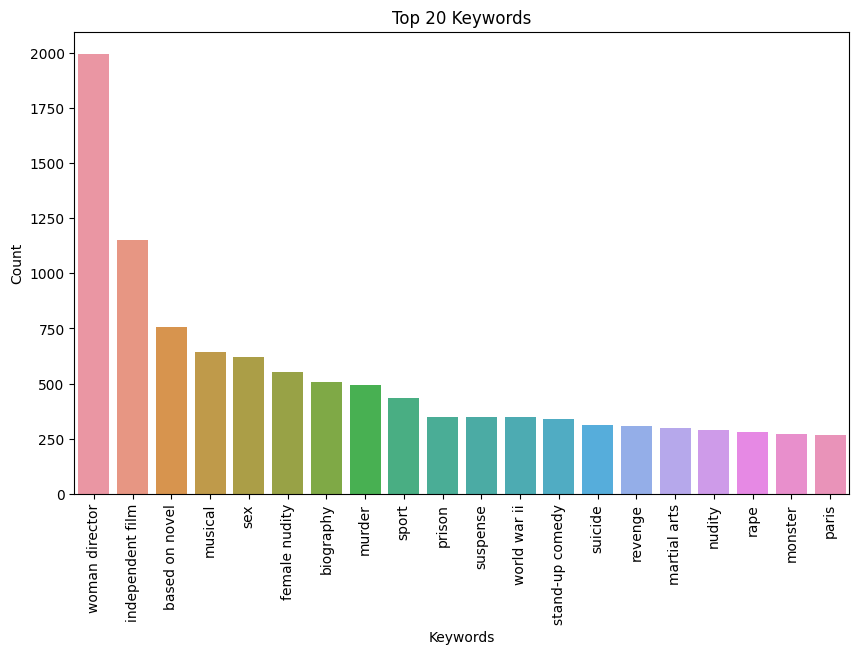

In [ ]:
keywords_occur = list_counter(keywords["keywords"].values)
keywords_cp = pd.DataFrame.from_records(keywords_occur, columns=["keywords", "count"]) ############################################################################

#figure size
plt.figure(figsize=(10, 6))

#seaborn barplot
sns.barplot(data=keywords_cp.head(20), x="keywords", y="count")

plt.xticks(rotation=90)

plt.xlabel("Keywords")
plt.ylabel("Count")
plt.title("Top 20 Keywords")

plt.show()

In [ ]:
print(movies.columns)
print(keywords.columns)

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime', 'status',
       'tagline', 'title', 'vote_average', 'vote_count', 'release_year'],
      dtype='object')
Index(['id', 'keywords'], dtype='object')


As you know, id parameters in both metadata and keywords is directing to the same movie. So we can merge these two datasets:

In [ ]:
movies = pd.merge(movies, keywords, on=['id'], how='left')

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45914 entries, 0 to 45913
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  45914 non-null  int64         
 1   budget                 8976 non-null   float64       
 2   genres                 45914 non-null  object        
 3   id                     45914 non-null  int32         
 4   original_language      45914 non-null  object        
 5   overview               44965 non-null  object        
 6   popularity             45914 non-null  float32       
 7   production_companies   34001 non-null  object        
 8   production_countries   45914 non-null  object        
 9   release_date           45914 non-null  datetime64[ns]
 10  revenue                7479 non-null   float64       
 11  runtime                45914 non-null  float64       
 12  status                 45914 non-null  object        
 13  t

***Release year:***

you can hover over the years to see the details.

In [ ]:
import plotly.express as px

fig = px.histogram(movies, x='release_year', color_discrete_sequence=['pink'], nbins=round((max(movies['release_year']) - min(movies['release_year'])) / 1))
fig.update_layout(xaxis_title='Release Year', yaxis_title='Number of Movies')
fig.show()

# Credits dataset

In [ ]:
credits = pd.read_csv('/content/content/MyDrive/credits.csv')

In [ ]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


As you can see, cast and crew type is stringified list of json. So we extract the names from the cast and directors from the crew.

In [ ]:
credits["cast"] = credits[['cast']].applymap(json_to_arr)

In [ ]:
credits['crew']

0        [{'credit_id': '52fe4284c3a36847f8024f49', 'de...
1        [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...
2        [{'credit_id': '52fe466a9251416c75077a89', 'de...
3        [{'credit_id': '52fe44779251416c91011acb', 'de...
4        [{'credit_id': '52fe44959251416c75039ed7', 'de...
                               ...                        
45471    [{'credit_id': '5894a97d925141426c00818c', 'de...
45472    [{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...
45473    [{'credit_id': '52fe4776c3a368484e0c8387', 'de...
45474    [{'credit_id': '533bccebc3a36844cf0011a7', 'de...
45475    [{'credit_id': '593e676c92514105b702e68e', 'de...
Name: crew, Length: 45476, dtype: object

In [ ]:
credits["cast"]

0                      [Tom Hanks, Tim Allen, Don Rickles]
1           [Robin Williams, Jonathan Hyde, Kirsten Dunst]
2               [Walter Matthau, Jack Lemmon, Ann-Margret]
3        [Whitney Houston, Angela Bassett, Loretta Devine]
4               [Steve Martin, Diane Keaton, Martin Short]
                               ...                        
45471          [Leila Hatami, Kourosh Tahami, Elham Korda]
45472           [Angel Aquino, Perry Dizon, Hazel Orencio]
45473         [Erika Eleniak, Adam Baldwin, Julie du Page]
45474    [Iwan Mosschuchin, Nathalie Lissenko, Pavel Pa...
45475                                                  NaN
Name: cast, Length: 45476, dtype: object

In [ ]:
def get_director(x):
    x = literal_eval(x)
    for i in x:
        if i == "[]" or isinstance(i, float):
            return np.nan
        if i['job'] == 'Director':
            return i['name']
    return np.nan

credits['director'] = credits['crew'].apply(get_director)
credits.drop(["crew"], axis=1, inplace=True)

Now we drop cells with missing both cast and director columns:

In [ ]:
print("Entries with no cast:", len(credits[credits["cast"].isna()]))
print("Entries with no directors:", len(credits[credits["director"].isna()]))
print("Entries missing both cast and directors:", len(credits[(credits["cast"].isna())&(credits["director"].isna())]))
credits.drop(credits[(credits["cast"].isna())&(credits["director"].isna())].index, inplace=True)

Entries with no cast: 2418
Entries with no directors: 887
Entries missing both cast and directors: 437


As you know, id parameters in both movies metadata and credits is directing to the same movie. So we can merge these two datasets:

In [ ]:
movies = pd.merge(movies, credits, on=['id'], how='left')

So the final dataset is:

In [ ]:
movies.shape
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46026 entries, 0 to 46025
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  46026 non-null  int64         
 1   budget                 9014 non-null   float64       
 2   genres                 46026 non-null  object        
 3   id                     46026 non-null  int32         
 4   original_language      46026 non-null  object        
 5   overview               45077 non-null  object        
 6   popularity             46026 non-null  float32       
 7   production_companies   34085 non-null  object        
 8   production_countries   46026 non-null  object        
 9   release_date           46026 non-null  datetime64[ns]
 10  revenue                7517 non-null   float64       
 11  runtime                46026 non-null  float64       
 12  status                 46026 non-null  object        
 13  t

In [ ]:
null_counts = movies.isna().sum()
print(null_counts)

belongs_to_collection        0
budget                   37012
genres                       0
id                           0
original_language            0
overview                   949
popularity                   0
production_companies     11941
production_countries         0
release_date                 0
revenue                  38509
runtime                      0
status                       0
tagline                  25360
title                        0
vote_average                 0
vote_count                   0
release_year                 0
keywords                 14311
cast                      2375
director                   839
dtype: int64


# Some other EDA and plots for understanding data:

In [ ]:
def missing_values(movies):
    print(f'Total null values count = {movies.isna().sum().sum()}')
    return movies.isna().sum()

In [ ]:
missing_values(movies)

Total null values count = 131296


belongs_to_collection        0
budget                   37012
genres                       0
id                           0
original_language            0
overview                   949
popularity                   0
production_companies     11941
production_countries         0
release_date                 0
revenue                  38509
runtime                      0
status                       0
tagline                  25360
title                        0
vote_average                 0
vote_count                   0
release_year                 0
keywords                 14311
cast                      2375
director                   839
dtype: int64

***Number of movies made in each language:***

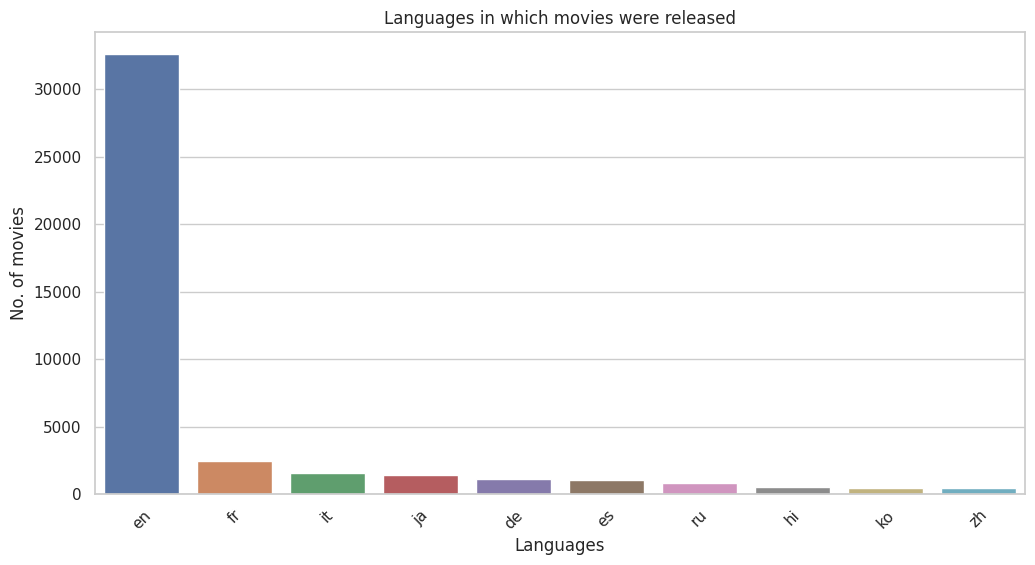

In [ ]:
lang_name = movies['original_language'].value_counts().index.tolist()[0:10]
lang_count = movies['original_language'].value_counts().tolist()[0:10]

sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=lang_name, y=lang_count, ax=ax)
plt.xticks(rotation=45)

plt.xlabel('Languages')
plt.ylabel('No. of movies')
plt.title('Languages in which movies were released')
plt.show()

Major number of movies are produced in English, with French and Italian following.



***Number of movies released each year:***

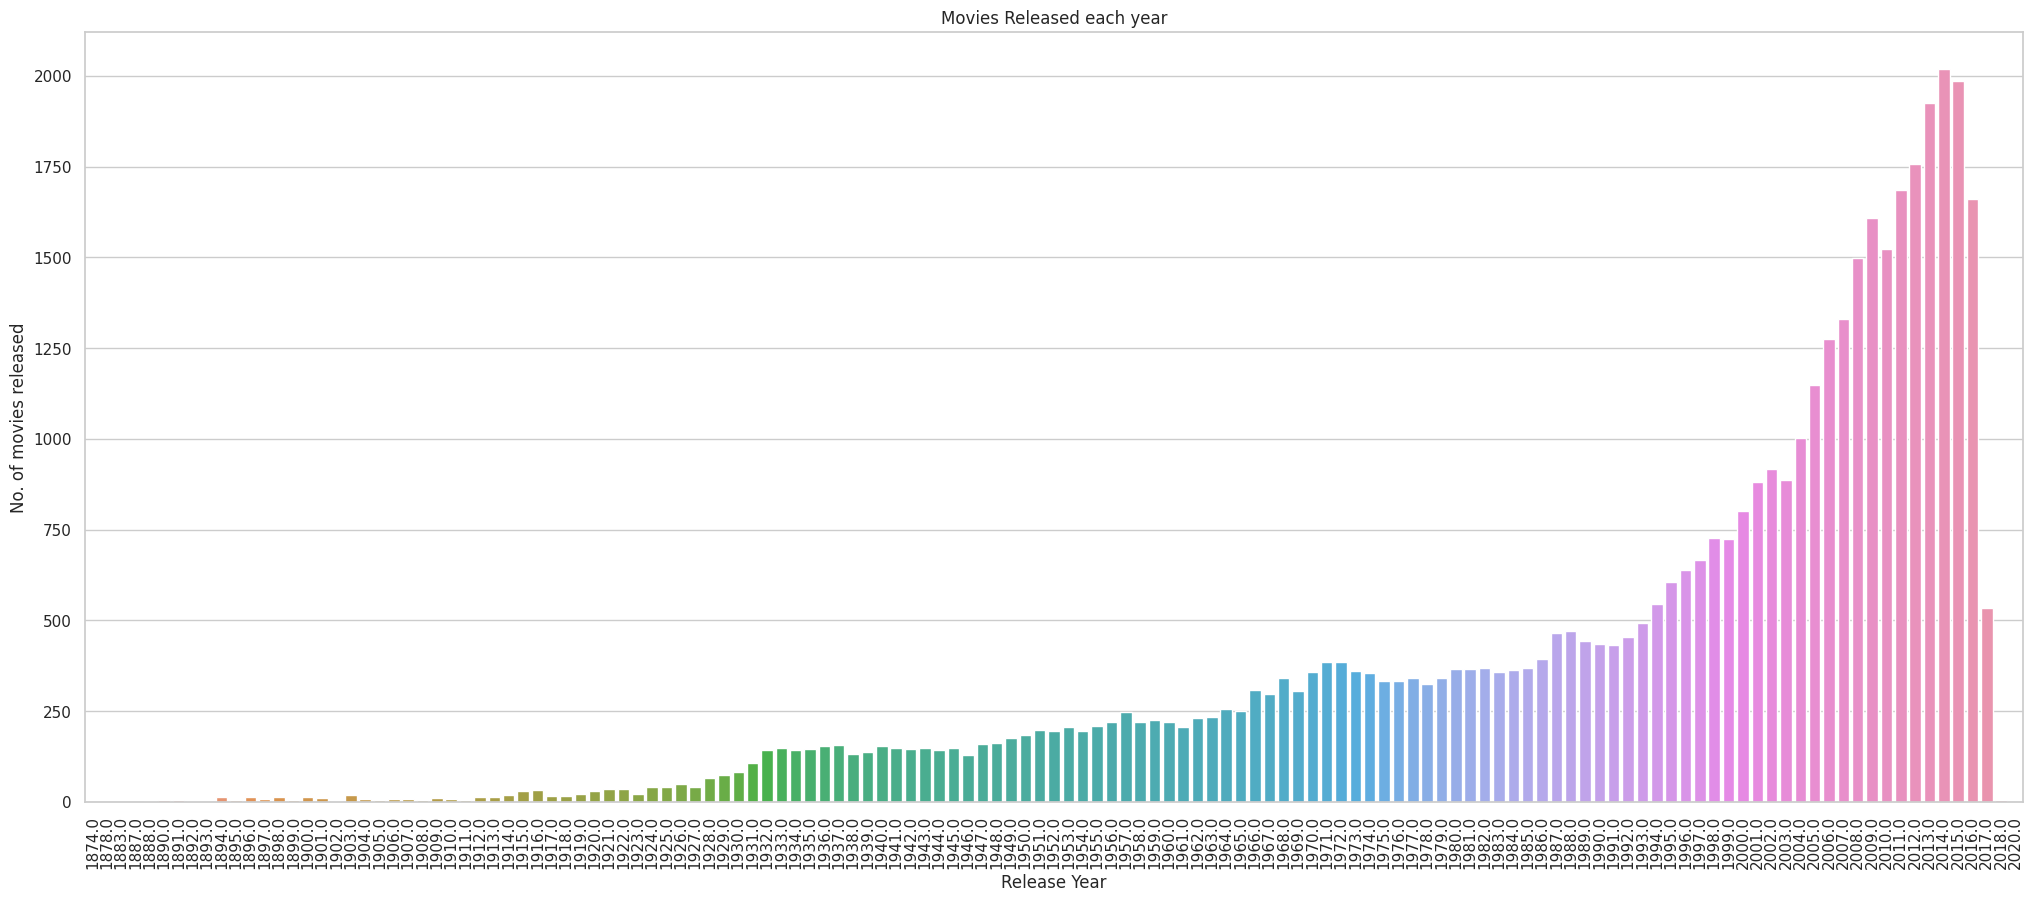

In [ ]:
year_name = movies['release_year'].value_counts().index.tolist()
year_count = movies['release_year'].value_counts().tolist()

fig = plt.figure(figsize = (25, 10))
sns.barplot(x=year_name, y=year_count)
plt.xticks(rotation=90)
plt.xlabel('Release Year')
plt.ylabel('No. of movies released')
plt.title('Movies Released each year')
plt.show()

As you can see, the year 2014 had the most released movies and after 1900, there has been a dramatic increase in the number of movies released each year.



***Revenue of movies in each year:***

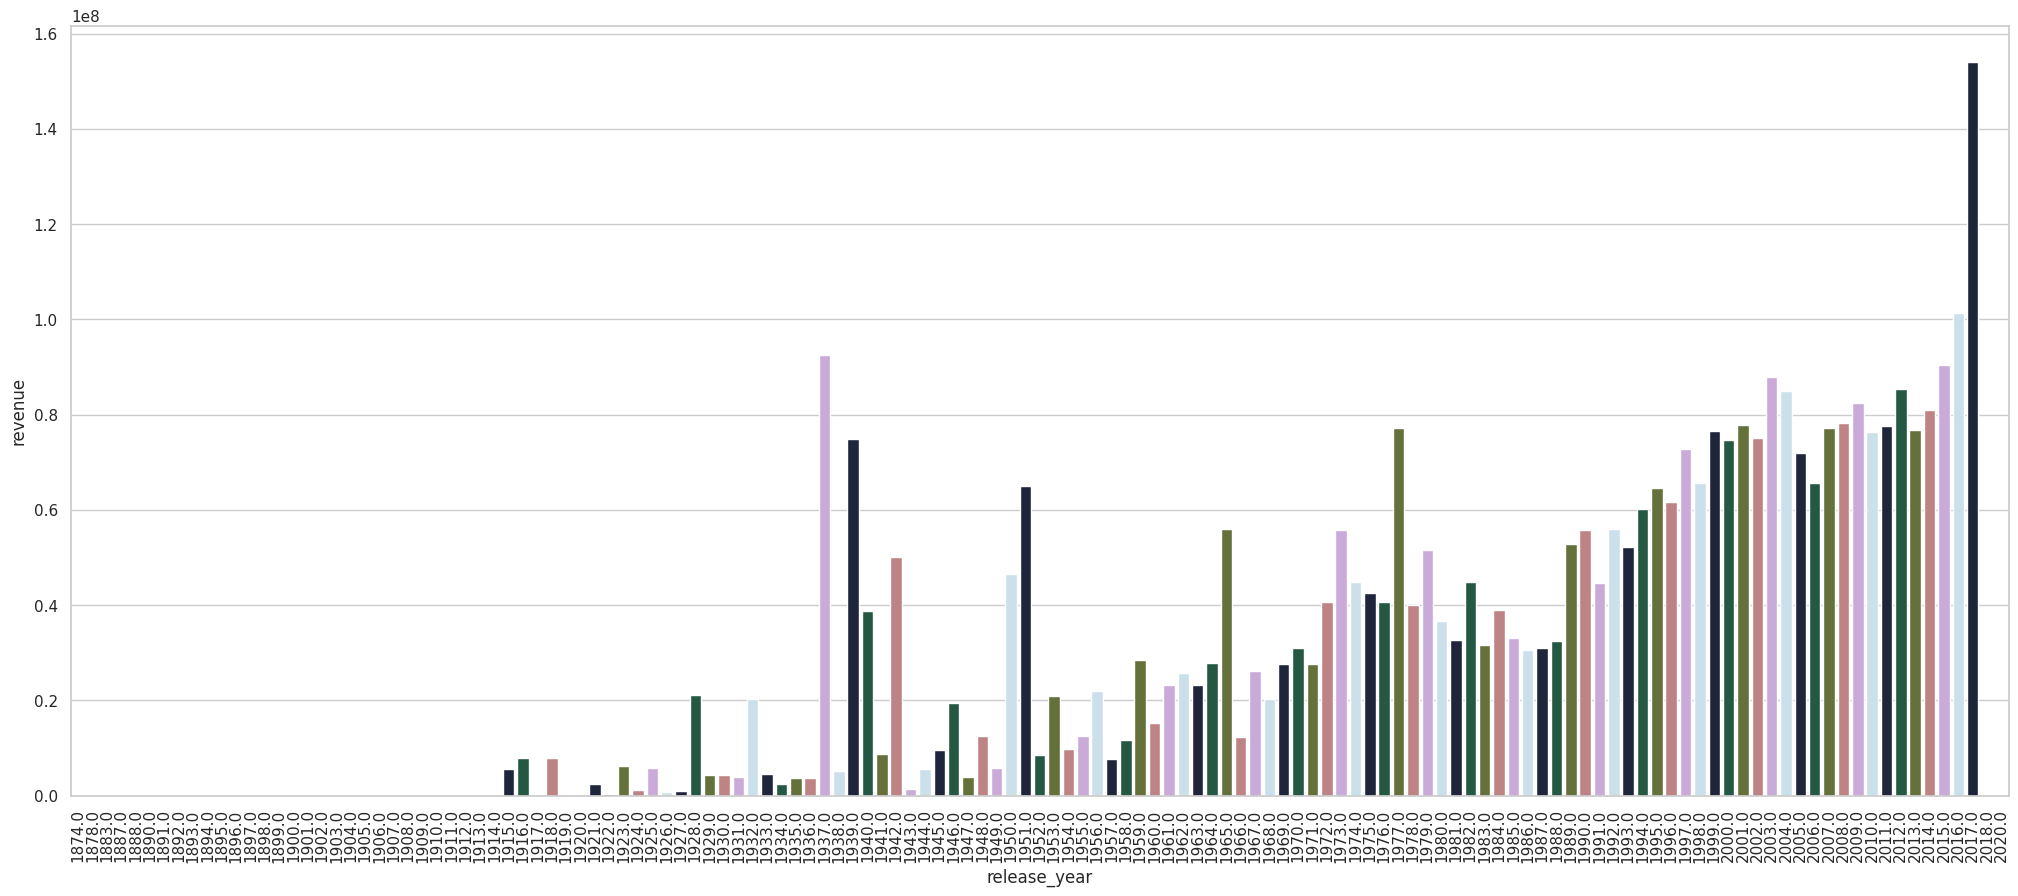

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(data = movies, x='release_year',y='revenue',errorbar=None, palette = sns.color_palette("cubehelix"))
plt.xticks(rotation=90)
plt.show()

The most revenue was earned by movies in 2017.

***All genres of movies:***

In [ ]:
def get_all_items(df , col):
    all_items = {}
    for row in df[col]:
        counter = 0
        if row == np.nan or isinstance(row,float) :
            continue
        for single_value in row:
            value = all_items.get(single_value)
            if value == None:
                all_items[single_value] = counter + 1
            else:
                all_items[single_value] = value + 1
    return all_items

This function get all uniqye categories(except NaN values) and return as a dictionary.

In [ ]:
all_genres = get_all_items(movies, 'genres')

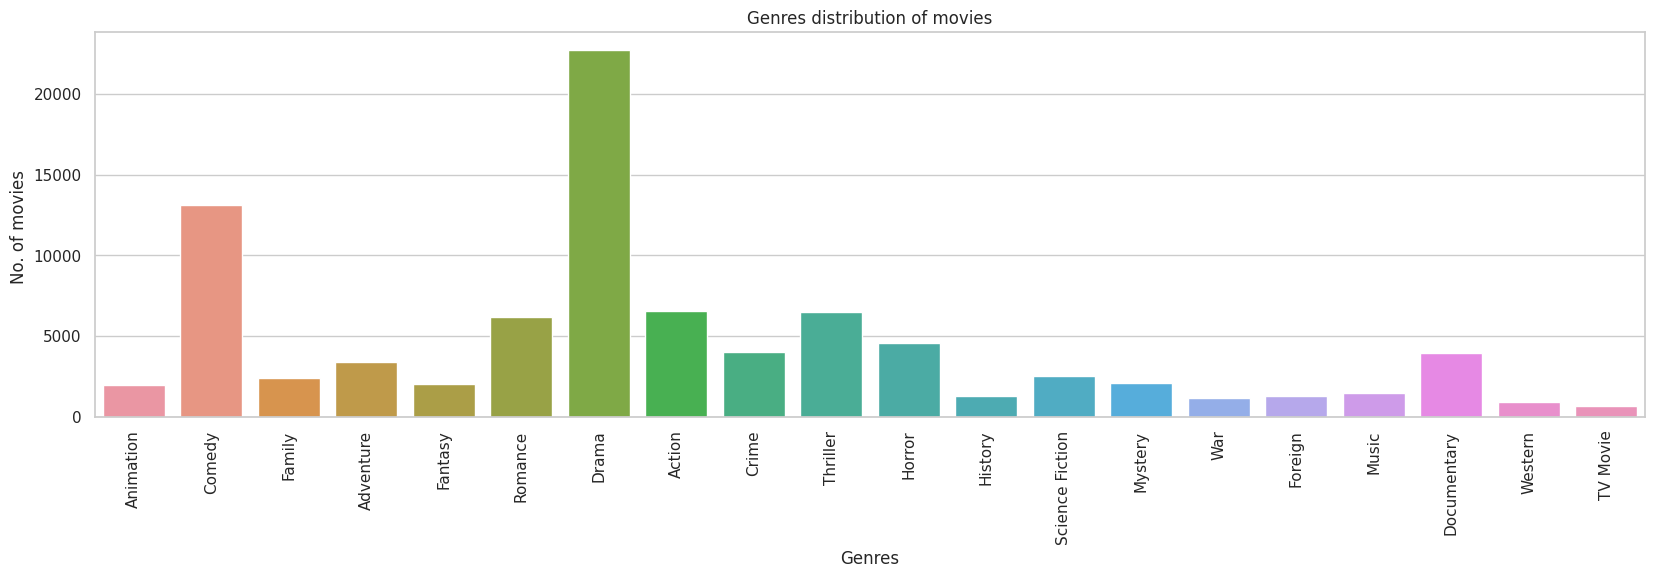

In [ ]:
fig = plt.figure(figsize = (20, 5))
all_genre_keys = list(all_genres.keys())
all_genre_values = [int(i) for i in all_genres.values()]
sns.barplot(x=all_genre_keys, y = all_genre_values)
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('No. of movies ')
plt.title('Genres distribution of movies')
plt.show()

Drama is liked in 1st place.

***Top 15 largest runtime movies:***

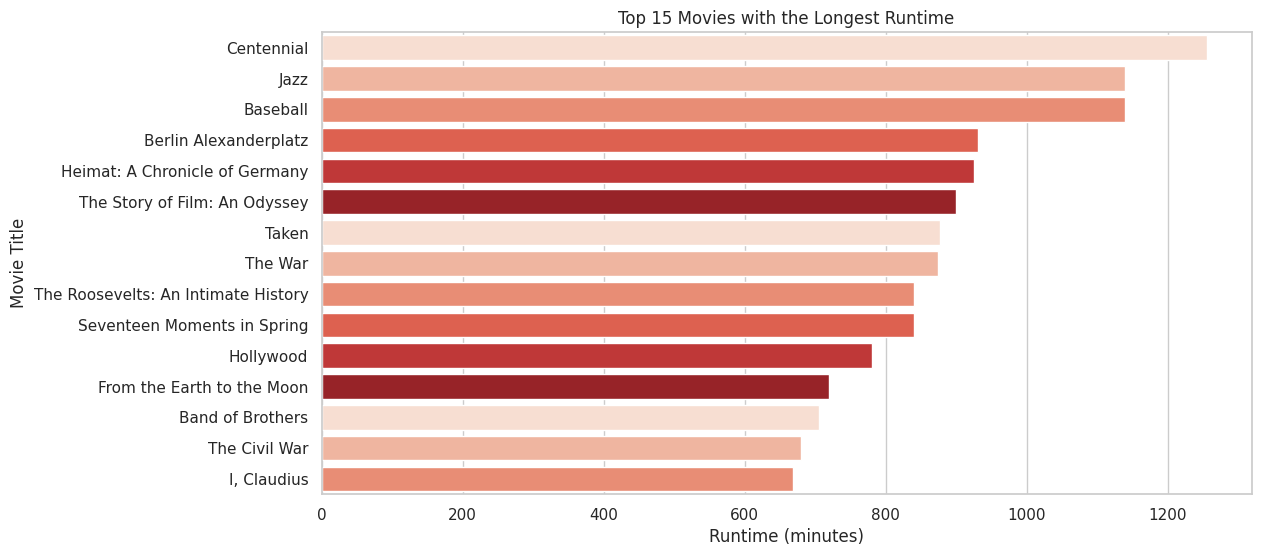

In [ ]:
largest_runtime = movies.nlargest(15, 'runtime')[['runtime', 'release_year', 'title']]
plt.figure(figsize=(12, 6))
sns.barplot(x=largest_runtime['runtime'], y=largest_runtime['title'], palette=sns.color_palette("Reds"))
plt.xlabel('Runtime (minutes)')
plt.ylabel('Movie Title')
plt.title('Top 15 Movies with the Longest Runtime')
plt.show()

Centennial is the longest runtime movie.

***Top 15 movies with highest budget:***

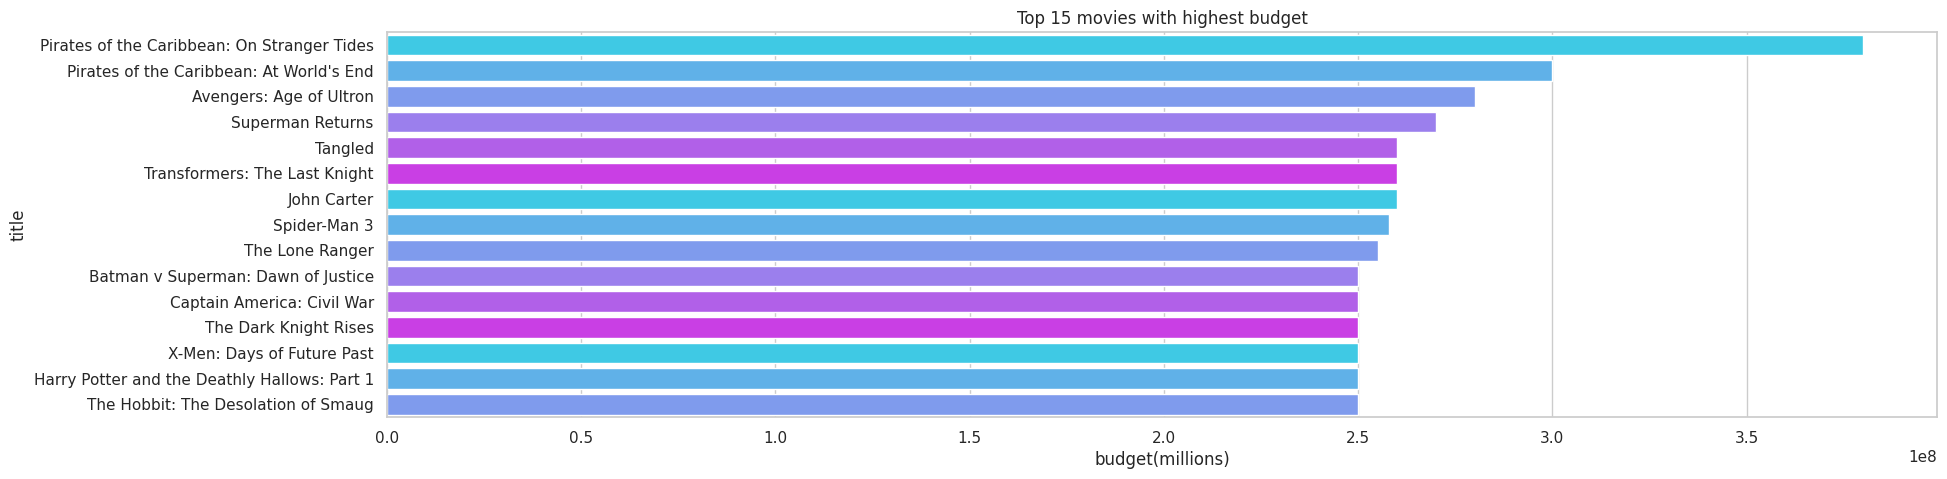

In [ ]:
budget_of_top_15 = movies.sort_values(by='budget',ascending=False)[0:15][['title','budget','release_year']]

plt.figure(figsize=(20,5))
sns.barplot(y=budget_of_top_15['title'],x=budget_of_top_15['budget'],errorbar=None , palette = sns.color_palette("cool"))
plt.xlabel('budget(millions)')
plt.title('Top 15 movies with highest budget')
plt.show()

Pirates of the Caribbean has the highest budget.

***Top 15 movies with highest revenue:***

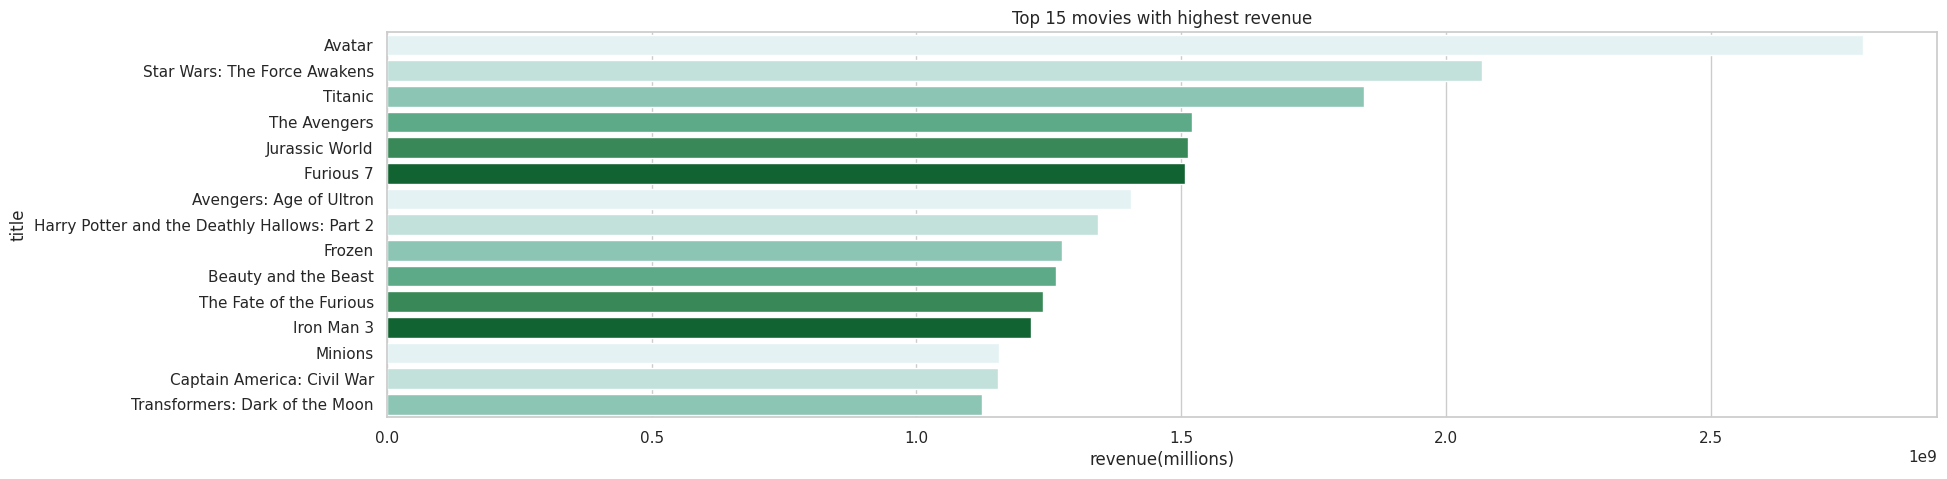

In [ ]:
revenue_of_top_15 = movies.sort_values(by='revenue',ascending=False)[0:15][['title','revenue','release_year']]

plt.figure(figsize=(20,5))
sns.barplot(y=revenue_of_top_15['title'],x=revenue_of_top_15['revenue'],errorbar=None , palette = sns.color_palette("BuGn"))
plt.xlabel('revenue(millions)')
plt.title('Top 15 movies with highest revenue')
plt.show()

Avatar has the highest revenue.

# Movie Recommandation

# Content-Based:

We are going to build an engine that computes the similarity between movies based on some metrics and recommends movies that are most similar to a specific movie that a user liked. Since we are going to use movie metadata (or content) to build this engine, this is also known as content based filtering.

In [ ]:
movies['overview'].head()

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object

Content Based Recommenders based on:

*   Movie Overviews and Taglines
*   Improved version using Rating and Popularity

Also, as mentioned in the introduction, I will be using a subset of all the movies available to us due to limiting computing power available to me.

In [ ]:
links_small = pd.read_csv('/content/content/MyDrive/links_small.csv')
links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')
links_small.head(3)

0      862
1     8844
2    15602
Name: tmdbId, dtype: int64

In [ ]:
smd = movies[movies['id'].isin(links_small)]
smd.shape

(9206, 21)

***Movie overview Based Recommender:***

In this section we will build a recommender using movie descriptions and taglines. We must assess our machine's performance qualitatively because we lack a quantitative metric for doing so.

In [ ]:
smd['tagline'] = smd['tagline'].fillna('')
smd['description'] = smd['overview'] + smd['tagline']
smd['description'] = smd['description'].fillna('')

<ipython-input-98-8b022d10038a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-98-8b022d10038a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-98-8b022d10038a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(smd['description'])
tfidf_matrix

<9206x268124 sparse matrix of type '<class 'numpy.float64'>'
	with 547742 stored elements in Compressed Sparse Row format>

In [ ]:
tfidf_matrix.shape

(9206, 268124)

Cosine Similarity:

IWe will use the Cosine Similarity to calculate a numeric quantity that denotes the similarity between two movies. Mathematically, it is defined as follows:

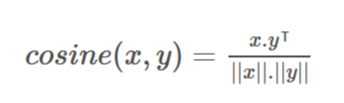

Since the TF-IDF Vectorizer was employed, calculating the Dot Product will immediately provide us with the Cosine Similarity Score. Because it is quicker, we will use sklearn's linear_kernel instead of cosine_similarities.

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

Then we will have a pairwise cosine similarity matrix for movies in our dataset:


In [ ]:
smd = smd.reset_index()
titles = smd['title']
indices = pd.Series(smd.index, index=smd['title'])

In [ ]:
def get_recommendations(title):
    idx = indices[title]
    print(idx)
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

get_recommendations('Made').head(10)

3524


4217                         Johnny Dangerously
3120                         The Way of the Gun
621                                     Thinner
8440                                 The Family
695                               The Godfather
6239                      The Constant Gardener
7184                          The International
3627                              Harlem Nights
7042    The Sisterhood of the Traveling Pants 2
6436                                Renaissance
Name: title, dtype: object

based on the cosine similarity score, the 30 most similar movies will be returned by this function.

In [ ]:
pd.DataFrame(cosine_sim)

,0,1,2,3,4,5,6,7,8,9,...,9196,9197,9198,9199,9200,9201,9202,9203,9204,9205
0,1.000000,0.006816,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.003783,0.003783,0.003783,0.003783,0.000000,0.000000,0.000000,0.000000
1,0.006816,1.000000,0.015334,0.000000,0.002196,0.014690,0.000000,0.000000,0.033009,0.0,...,0.003875,0.003875,0.008329,0.008329,0.008329,0.008329,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.015334,1.000000,0.000000,0.007914,0.000000,0.000000,0.002338,0.000000,0.0,...,0.000000,0.000000,0.003166,0.003166,0.003166,0.003166,0.005212,0.005212,0.005212,0.005212
3,0.000000,0.000000,0.000000,1.000000,0.000000,0.002165,0.000000,0.006523,0.000000,0.0,...,0.000000,0.000000,0.009255,0.009255,0.009255,0.009255,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.002196,0.007914,0.000000,1.000000,0.000000,0.008285,0.000000,0.011373,0.0,...,0.004744,0.004744,0.001518,0.001518,0.001518,0.001518,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9201,0.003783,0.008329,0.003166,0.009255,0.001518,0.009060,0.000000,0.007865,0.002728,0.0,...,0.076869,0.076869,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
9202,0.000000,0.000000,0.005212,0.000000,0.000000,0.000000,0.000000,0.005051,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
9203,0.000000,0.000000,0.005212,0.000000,0.000000,0.000000,0.000000,0.005051,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
9204,0.000000,0.000000,0.005212,0.000000,0.000000,0.000000,0.000000,0.005051,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000


Some examples to test our recommandation:

In [ ]:
sim_scores = list(enumerate(cosine_sim[2]))

In [ ]:
get_recommendations('Rustom').head(10)

9190


9098                   Manson Family Vacation
5003                       That Touch of Mink
7028                                    Felon
4528                              Life Stinks
6954                             Street Kings
1484                          Doctor Dolittle
560                        Courage Under Fire
7699    The Agony and Ecstasy of Phil Spector
4517                     The Thrill of It All
5253                         To Hell and Back
Name: title, dtype: object

In [ ]:
smd.head(50)

,index,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,...,status,tagline,title,vote_average,vote_count,release_year,keywords,cast,director,description
0,0,1,30000000.0,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[US],...,Released,,Toy Story,7.7,5415.0,1995.0,"[jealousy, toy, boy]","[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter,"Led by Woody, Andy's toys live happily in his ..."
1,1,0,65000000.0,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[US],...,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995.0,"[board game, disappearance, based on children'...","[Robin Williams, Jonathan Hyde, Kirsten Dunst]",Joe Johnston,When siblings Judy and Peter discover an encha...
2,2,1,NaN,"[Romance, Comedy]",15602,en,A family wedding reignites the ancient feud be...,11.712900,"[Warner Bros., Lancaster Gate]",[US],...,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995.0,"[fishing, best friend, duringcreditsstinger]","[Walter Matthau, Jack Lemmon, Ann-Margret]",Howard Deutch,A family wedding reignites the ancient feud be...
3,3,0,16000000.0,"[Comedy, Drama, Romance]",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[Twentieth Century Fox Film Corporation],[US],...,Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,1995.0,"[based on novel, interracial relationship, sin...","[Whitney Houston, Angela Bassett, Loretta Devine]",Forest Whitaker,"Cheated on, mistreated and stepped on, the wom..."
4,4,1,NaN,[Comedy],11862,en,Just when George Banks has recovered from his ...,8.387519,"[Sandollar Productions, Touchstone Pictures]",[US],...,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995.0,"[baby, midlife crisis, confidence]","[Steve Martin, Diane Keaton, Martin Short]",Charles Shyer,Just when George Banks has recovered from his ...
5,5,0,60000000.0,"[Action, Crime, Drama]",949,en,"Obsessive master thief, Neil McCauley leads a ...",17.924927,"[Regency Enterprises, Forward Pass, Warner Bros.]",[US],...,Released,A Los Angeles Crime Saga,Heat,7.7,1886.0,1995.0,"[robbery, detective, bank]","[Al Pacino, Robert De Niro, Val Kilmer]",Michael Mann,"Obsessive master thief, Neil McCauley leads a ..."
6,6,0,58000000.0,"[Comedy, Romance]",11860,en,An ugly duckling having undergone a remarkable...,6.677277,"[Paramount Pictures, Scott Rudin Productions, ...","[DE, US]",...,Released,You are cordially invited to the most surprisi...,Sabrina,6.2,141.0,1995.0,"[paris, brother brother relationship, chauffeur]","[Harrison Ford, Julia Ormond, Greg Kinnear]",Sydney Pollack,An ugly duckling having undergone a remarkable...
7,7,0,NaN,"[Action, Adventure, Drama]",45325,en,"A mischievous young boy, Tom Sawyer, witnesses...",2.561161,[Walt Disney Pictures],[US],...,Released,The Original Bad Boys.,Tom and Huck,5.4,45.0,1995.0,NaN,"[Jonathan Taylor Thomas, Brad Renfro, Rachael ...",Peter Hewitt,"A mischievous young boy, Tom Sawyer, witnesses..."
8,8,0,35000000.0,"[Action, Adventure, Thriller]",9091,en,International action superstar Jean Claude Van...,5.231580,"[Universal Pictures, Imperial Entertainment, S...",[US],...,Released,Terror goes into overtime.,Sudden Death,5.5,174.0,1995.0,"[terrorist, hostage, explosive]","[Jean-Claude Van Damme, Powers Boothe, Dorian ...",Peter Hyams,International action superstar Jean Claude Van...
9,9,1,58000000.0,"[Adventure, Action, Thriller]",710,en,James Bond must unmask the mysterious head of ...,14.686036,"[United Artists, Eon Productions]","[GB, US]",...,Released,No limits. No fears. No substitutes.,GoldenEye,6.6,1194.0,1995.0,"[cuba, falsely accused, secret identity]","[Pierce Brosnan, Sean Bean, Izabella Scorupco]",Ma

In [ ]:
smd.shape

(9206, 23)

***Improved version using Rating and Popularity:***

Now we want to improve our recommandation system and we will add a mechanism to return movies which are popular and have had a good critical response and remove bad movies.

Until now, our recommendation system recommends movies regardless of ratings and popularity. Now we will use them:

In [ ]:
#IMDB formula
vote_counts = movies[movies['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = movies[movies['vote_average'].notnull()]['vote_average'].astype('int')
C = vote_averages.mean()

m = vote_counts.quantile(0.95)

In [ ]:
def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In this part we calculated a weighted rating for each movie based on its vote count, average rating, and the IMDB formula, and adds the calculated ratings to the 'movies' DataFrame for further analysis and comparison.

In [ ]:
def improved_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]

    movies = smd.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'release_year']]
    vote_counts = movies[movies['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = movies[movies['vote_average'].notnull()]['vote_average'].astype('int')

    C = vote_averages.mean()
    m = vote_counts.quantile(0.60)

    qualified = movies[(movies['vote_count'] >= m) & (movies['vote_count'].notnull()) & (movies['vote_average'].notnull())]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    qualified['wr'] = qualified.apply(weighted_rating, axis=1)
    qualified = qualified.sort_values('wr', ascending=False).head(15)

    return qualified

The 60th percentile movie's vote was calculated using the top 25 movies based on similarity scores. The weighted rating of each movie was determined using the IMDB formula, using this as the value of m.

In [ ]:
improved_recommendations('Se7en')

<ipython-input-111-29bee859bee5>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-111-29bee859bee5>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-111-29bee859bee5>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,vote_count,vote_average,release_year,wr
7141,Seven Pounds,2092,7,2008.0,6.700930
6677,Zodiac,2080,7,2007.0,6.699500
5051,Monster,500,7,2003.0,6.189523
3440,The Magnificent Seven,472,7,1960.0,6.164392
4125,Insomnia,1181,6,2002.0,5.799284
1773,Cube,1101,6,1997.0,5.788803
2422,The Bone Collector,843,6,1999.0,5.746033
9093,Solace,740,6,2015.0,5.723694
3097,The Cell,442,6,2000.0,5.629376
8064,The Raven,432,6,2012.0,5.625082


In [ ]:
improved_recommendations('Mean Girls')

<ipython-input-111-29bee859bee5>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-111-29bee859bee5>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-111-29bee859bee5>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,vote_count,vote_average,release_year,wr
9152,Sing Street,669,8,2016.0,6.922223
8154,Pitch Perfect,2310,7,2012.0,6.724716
1092,Cape Fear,692,7,1991.0,6.328091
6358,District B13,572,6,2004.0,5.677413
4948,The Last Boy Scout,502,6,1991.0,5.653211
7157,Wild Child,421,6,2008.0,5.620241
611,The Craft,388,6,1996.0,5.604940
1686,Nineteen Eighty-Four,311,6,1984.0,5.563943
3361,Revenge of the Nerds,204,6,1984.0,5.490466
7541,Death at a Funeral,248,5,2010.0,5.158241


In [ ]:
smd.isnull().sum()

index                       0
belongs_to_collection       0
budget                   4511
genres                      0
id                          0
original_language           0
overview                   12
popularity                  0
production_companies      679
production_countries        0
release_date                0
revenue                  4373
runtime                     0
status                      0
tagline                     0
title                       0
vote_average                0
vote_count                  0
release_year                0
keywords                  770
cast                       91
director                   24
description                 0
dtype: int64